<h1><center>Równanie Lotki-Volterry do opisu zależności w ekosystemie. Model drapieżnik-ofiara</center></h1>

# Spis treści:
### 1. [Wstęp](#1)
### 2. [Model - część teoretyczna](#2)
   * ##### [Historia modelu](#2_1)
   * ##### [Opis modelu](#2_2)
   * ##### [Próba rozwiązania](#2_3)
### 3. [Model w Pythonie - część praktyczna](#3)
   * ##### [Rozwiązanie numeryczne za pomocą metody Eulera](#3_1)
   * ##### [Rozwiązanie numeryczne za pomocą metody Rungego-Kutty (4-tego stopnia)](#3_2)
   * ##### [Porównanie metod Eulera i Runge-Kutty](#3_3)
### 4. [Modyfikacje modelu podstawowego](#4)
### 5. [Analiza wyników symulacji i wnioski](#5)
   * ##### [Analiza podstawy](#5_1)
   * ##### [Analiza modyfikacji](#5_2)
   * ##### [Porównanie z modelem rozwoju agresji](#5_3)
### 7. [Zakończenie](#6)
### 8. [Bibliografia](#7)



# Wstęp <a id="1"></a>

#### ... bo czym byłaby udana podróż bez punktu startowego

##### Witamy w naszej podróży po *groźnie brzmiącym* świecie modelu drapieżnik-ofiara, czyli Lotki-Volterry. Postaramy się jednak, aby była ona raczej poszczerzeniem horyzontów, aniżeli drogą przez mękę. Zacznijmy od określenia punktu A wejścia i B wyjścia - motywacji i celów: 

### Motywacja:

* czlowiek jako istota pełna antagonizmów poprzez poznanie skrajności może dojść do fundamentalnych konkluzji, a przez kulturę przewija się od zawsze motyw walki dobra ze złem, dlatego uznaliśmy, że jest to temat warty zgłębienia,

* na 1 roku na projekcie z Pakietów matematycznych braliśmy pod lupę model rozwoju agresji w społeczeństwie z elementami teorii gier, dlatego uznaliśmy, że warto pociągnąć ten informatyczny temat w kontekście matematycznym,

* w globalnym kontekście uważamy, że jest to realny problem który można przestudiować, co może podnieść naszą świadomość w sprawie utrzymania niektórych ekosystemów.

### Cele:
* zapoznanie się z modelem Lotki-Volterry i implementacja w wraunkach programistycznych, 

* „udziwnienie” modelu (poprzez jego „unormalnienie”), czyli wprowadzenie dodatkowych zmiennych upodabniających model do świata realnego,

* przeprowadzenie symulacji oraz ich analiza,

* wyciągnięcie wniosków oraz porównanie wyników z wynikami symulacji rozwoju agresji z wyżej wspomniangeo projektu,

* zadanie dodatkowych pytań i próba odpowiedzi na nie (np. co byłoby kluczowe, aby taka symulacja odzwierciedlała w pełni rzeczywistość, co by nam dał eksperyment, tutaj jeszcze jedno krótkie pytanie itp.)

##### Mapę po naszym projekcie można znaleźć na samej górze. A skoro już wiemy skąd wychodzimy i dokąd zmierzamy, to jako że droga jest w każdej podróży najważniejsza, właśnie do niej przejdźmy.


***

# Model - część teoretyczna <a id="2"></a>

#### ...czyli o dwóch takich, co wpadli na to samo

### Historia modelu <a id="2_1"></a>

Zależności na linii drapieżnik-ofiara obserwuje się w przyrodzie od zawsze. Jest to konsekwencją przyjmowania różnych strategii na drodze do osiągnięcia zamierzonego celu. W interakcjach między orgzanizmami w ekosystemie tym celem jest najczęściej przeżycie. Takie zależności występowały między jednokomórkowcami, występowały między dinozaurami, występują do dnia dzisiejszego w świecie roślin i zwierząt. Tak głęboko zakorzeniony problem musiał być w końcu wzięty pod lupę. I został. Na początku XX wieku.

W 1910 roku amerykański matematyk Alfred James Lotka publikuje teorię o autokatalitycznych reakcjach chemicznych. Sam Lotka, pasjonat chemii fizycznej, chce przenieść swoją wiedzę na obszar biologii i rozwinąć dziedzinę biologii fizycznej, gdyż obiema sferami rządzą analogiczne podstawowe prawa. Jego praca zostaje zauważona w latach 20., a matematykowi zostają umożliwione dalsze badania. W tych z 1925 roku dochodzi do modelu, w którym interakcja w środowisku między drapieżnikiem a ofiarą przyjmuje postać nietłumionej, ciągłęj oscylacji dwóch skrajnych gatunków.


W tym samym roku włoski matematyk Vito Volterra, niezależnie od Alfreda Lotki, podejmuje się analizy problemu rybaków na Morzu Adriatyckim. Wyławianych jest więcej ryb drapieżnych w okresie po 1. wojnie światowej, choć pozornie wszystkie populacje ryb powinny ucierpieć w wyniku konfliktu. Jak wyjasniał później Volterra, było to spowodowane zaprzestaniem połowu w tym okresie, a w takim wypadku populacja drapieżników wróciła do „normy". W 1926 roku opublikował pracę opierającą się na modelu populacyjnym, z podobną oscylacją opisaną przez Lotkę. 

<
Równania opisujące interakcje drapieżnik-ofiara zostały w późniejszym czasie nazwane **Modelem Lotki-Volterrego**, który stanowi podstawę dalszych badań w zakresie ekologii matematycznych populacji (*mathematical population ecology*) i jest kamieniem milowym w tej dziedzinie.

***

### Opis modelu <a id="2_2"></a>

Wprowadźmy teraz równania modelu Lotki-Volterry. Zakładamy, że w ekosystemie występują 2 gatunki: ofiary oraz drapieżniki. Dla prostoty przyjmijmy za nie odpowiednio przedstawicieli zająców (oznaczenie $R$, z ang. *rabbit*) oraz lisów (oznaczenie $F$, z ang. *fox*). Układ równań różniczkowych dynamiki zmiany w populacjach wygląda następująco:

\begin{equation}
    \begin{split}
        \frac{\mathbb{d}R}{\mathbb{d}t}&= cR - aRF \\[1 em]
        \frac{\mathbb{d}F}{\mathbb{d}t}&= -dF + abRF
    \end{split}
\end{equation}

gdzie poszczególne składniki oznaczają:

* lewe strony równań odzwierciedlać mają opis zmiany liczebności populacji ofiar w jednostce czasu,

* $cR$ i $-dF$ opisują dynamikę wewnątrzgatunkową zająców oraz lisów (reprezentowanych przez $R$ i $F$), natomiast $c$ i $d$ są odpowiednio współczynnikami rozrodzczości ofiar oraz śmierci drapieżników,

* wyrażenia z członem $RF$ opisują zależność międzygatunkową - razem ze współczynnikiem $a$, oznaczającym rozrodczość drapieżników przy okazji udanych łowów, ukazują, do ilu spotkań w zająca i lisa w danym momencie symulacji doszło na podstawie losowego ich poruszania się po jakimś terenie,

* dodatkowy współczynnik $b$ w równaniu drugim reprezentuje ubytek energetyczny, do którego dochodzi w wypadku rozmnożenia lisów przy okazji udanych łowów.

Jeśli chodzi o opis zachowania samego modelu można to wysnuć mając same równania. 
* ofiary pod nieobecność drapieżników nie mają żadnych zagrożeń i mogą się swobodnie rozmnażać (właściwie, w modelu Lotki-Volterry opisanym, ich rozmnażanie przyjmuje maltuzjański model wzrostu populacji, tzn. zające rozmnażają się bez ograniczeń),

* jednakże jeśli w takim środowisku pojawi się gatunek drapieżnika, wykorzysta on warunki i będzie żerować na rozrośniętej populacji zajęcy (stąd ujemny znak przy $RF$ w równaniu dla $R$- populacja zajęcy się zmniejsza w spotkaniach, a w równaniu dla $F$ dodatni- ich populacja się zwiększa),

* nie da się jednak ukryć, że lisy nie będą w stanie funkcjonować nie mając pożywienia, do czego doprowadzić mogą nadmierne łowy i śmierć zajęcy, stąd śmierć głodowa lisów reprezentowana przez ujemnny znak przy wyrażeniu $dF$, a sytuacji tej nie omieszkają nie wykorzystać zające, które w tym czasie odbudowują swoją populację i wracamy do punktu wyjścia.

***

### Próba rozwiązania <a id="2_3"></a>

Postaramy się teraz wyznaczyć analitycznie postać ogólną rozwiązania dla punktów krytycznych poprzez analizę asymptotyki rozwiązań układu $(1)$. Przepiszmy nasze równania jeszcze raz

\begin{equation*}
    \begin{split}
        \frac{\mathbb{d}R}{\mathbb{d}t}&= cR - aRF \\[1 em]
        \frac{\mathbb{d}F}{\mathbb{d}t}&= -dF + abRF .
    \end{split}
\end{equation*}

Jako że w przypadku stanów stacjonarnych pochodne mają być równe 0, możemy nasze równania zapisać w następującej formie

\begin{equation*}
    \begin{split}
        R(c - aF)&= 0 \\[1 em]
        F(abR-d)&= 0 .
    \end{split}
\end{equation*}

Łatwo wywnioskować, że punktami krytycznymi są $(0,0)$ oraz $(\frac{d}{ab},\frac{c}{a})$. Stabliność obu z nich można wyznaczyć wykonując linearyzację macierzą Jacobiego, która ma postać

$$J(R,F) = \begin{pmatrix} f_{R} & f_{F} \\ g_{R} & g_{F} \end{pmatrix} = 
\begin{pmatrix} c - aF & -aR \\ abF & abR-d \end{pmatrix} .$$

Macierz Jacobiego dla punktu $(0,0)$ wygląda następująco

$$J(0,0) = \begin{pmatrix} c & 0 \\ 0 & -d \end{pmatrix} .$$

W naszym modelu współczynniki $c$ i $d$ są dodatnie, więc jest to punkt siodłowy, a wektory własne Jakobianu to $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ i $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ (dla wartości własnych macierzy Jacobiego $c$ i -$d$). Zatem to rozwiązanie ogólne to

$$C_1 \begin{pmatrix} 1 \\ 0 \end{pmatrix} e^{ct} + C_2 \begin{pmatrix} 0 \\ 1 \end{pmatrix} e^{-dt} .$$

Jednkaże, nie jest to stabilny punkt, a gdyby był stabilny, to, jako że populacje by do tego punktu „zmierzały", przy odpowiednich warunkach cały ekosystem dążyłby do wymarcia.

Weźmy teraz drugi punkt krytyczny $\biggl(\cfrac{d}{ab},\cfrac{c}{a}\biggr)$. Macierz Jacobiego dla niego ma postać

$$J= \left(\frac{d}{ab},\frac{c}{a}\right) = \begin{pmatrix} 0 & \frac{\text{-}ad}{ab} \\ \frac{cab}{a} & 0 \end{pmatrix} = \begin{pmatrix} 0 & \frac{\text{-}d}{b} \\ cb & 0 \end{pmatrix} .$$

Wartości własne tej macierzy są równe $\pm i\sqrt{cd}$, a zatem są one „czysto" urojone, a stąd, że ślad macierzy jest równy 0, natomiast wyznacznik dodatni, wynika, że nasze rozwiązanie będzie miało tzw. środek (nie jest on ani stabilny, ani niestabilny), w którego otoczeniu będzie się odbywać okresowy ruch trajektorii. Oznacza to, że system samoistnie w pewnym okresie przeżywa okresy rozmnażania i umierania obu gatunków.<br>

Rozwiązanie ogólne dla tego przypadku urojonego będzie przyjmowało postać <br>
<br>
$$ A\begin{pmatrix} 1 \\ 0 \end{pmatrix} \cos{(\sqrt{cd}t+\phi)} + B\begin{pmatrix} 0 \\ 1 \end{pmatrix} \sin{(\sqrt{cd}t+\phi)} ,$$

gdzie $A$ i $B$ oznaczają pewne amplitudy drgań odpowiednio dla populacji $R$ i $F$, a $\phi$ to pewne odchylenia, które w oscylacjach mogą się pojawić i je uwzględniamy.

Aby zobaczyć ową okresowość ruchu trajektorii, wracamy do równań z samego początku. Ich pochodna po czasie musi być równa 0. Możemy je najpierw pomnożyć odpowiednio razy $ab$ i $a$. Otrzymujemy
 
 \begin{equation*}
    \begin{split}
        ab\cdot\frac{\mathbb{d}R}{\mathbb{d}t}&= abcR - a^{2}bRF \\[1 em]
        a\cdot\frac{\mathbb{d}F}{\mathbb{d}t}&= -adF + a^{2}bRF .
    \end{split}
\end{equation*}

Pozbywamy się członu z $RF$ i zapisujemy

$$ ab\cdot\frac{\mathbb{d}R}{\mathbb{d}t} + a\cdot\frac{\mathbb{d}F}{\mathbb{d}t} = abcR -adF .$$ 

Użyjemy teraz małej sztuczki, która polegać będzie na przedstawieniu pochodnych od logarytmów $R$ i $F$. Można to zapisać jako

\begin{equation*}
    \begin{split}
        \frac{\mathbb{d}}{\mathbb{d}t}(\ln{R})&= 
        \frac{1}{R}\cdot\frac{\mathbb{d}R}{\mathbb{d}t}(\ln{R}) = c - aF , \\[1 em]
        \frac{\mathbb{d}}{\mathbb{d}t}(\ln{F})&= 
        \frac{1}{F}\cdot\frac{\mathbb{d}F}{\mathbb{d}t}(\ln{F}) =  -d +abR ,
    \end{split}
\end{equation*}

co daje nam tylko liniowe i stałe wyrażenia. Jeśli teraz pomnożymy te równania, aby stałe wyrażenia się skróciły, otrzymujemy 

$$ d\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{R}) + c\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{F}) = abcR - adF .$$

Widać podobieństwo z członem u góry? Zatem odejmujemy od niego to, co nam wyszło tutaj i mamy

$$ ab\cdot\frac{\mathbb{d}R}{\mathbb{d}t} + a\cdot\frac{\mathbb{d}F}{\mathbb{d}t} - d\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{R}) - c\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{F}) = 0,$$

a całkując obustronnie ostatecznie dostajemy 

$$ abR + aF - d\ln{R} - c\ln{F} = C ,$$

gdzie $C$ jest pewną stałą całkowania. Jednak ta stała udowadnia nam, że trajektoria pozostaje niezmienną, okresową, zamkniętą krzywą dla odpowiednio zdefiniowanych współczynników $a$, $b$, $c$, $d$. To pozwala później zdefiniować zbiór takich krzywych, których rozwiązania krążą wokół naszego punktu krytycznego.

C:\Users\zawer\AppData\Local\Temp\ipykernel_2620\1309010507.py:6: RuntimeWarning: divide by zero encountered in log
  return a*b*x + a*y - d*np.log(x) -c* np.log(y) - C


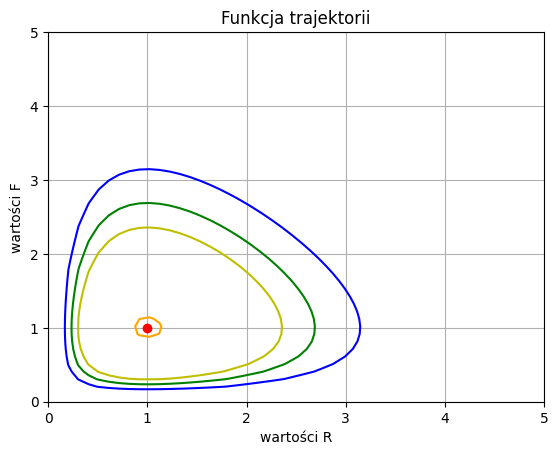

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation
def equation(x,y,a,b,c,d,C):
    return a*b*x + a*y - d*np.log(x) -c* np.log(y) - C

a=1
b=1
c=1
d=1
C_1 = 2.7
C_2 = 2.5
C_3 = 3
C_4 = 2.01
crit_point = (d/a*b,c/a)
x_values = np.linspace(0, 5)
y_values = np.linspace(0, 5)

X, Y = np.meshgrid(x_values, y_values)

T_1 = equation(X, Y,a,b,c,d,C_1)
T_2 = equation(X, Y,a,b,c,d,C_2)
T_3 = equation(X, Y,a,b,c,d,C_3)
T_4 = equation(X, Y,a,b,c,d,C_4)

plt.plot(crit_point[0],crit_point[1],'ro')
plt.contour(X, Y, T_1, levels=[0], colors='g')
plt.contour(X, Y, T_2, levels=[0], colors='y')
plt.contour(X, Y, T_3, levels=[0],colors='b')
plt.contour(X, Y, T_4, levels=[0], colors='orange')
plt.plot()

plt.xlabel('wartości R')
plt.ylabel('wartości F')
plt.title('Funkcja trajektorii')
plt.grid(True)

plt.show()

Jak widać na wykresie trajektorie dla rosnących wartości $C$ podanych w kodzie zwiększają coraz bardziej swoją amplitudę (co widać w zmieniającej się wielkości), okrążając punkt krytyczny. Za współczynniki $a$,$b$,$c$,$d$ przyjęliśmy w tym przypadku jedynki, aby funkcja nie była zbyt skomplikowana. Poprawność jej sprawdzimy później przy prezentacji działania modelu. 
* Można modyfikować wartości współczynników oraz stałe trajektorii $C$, jednak trzeba pamiętać, że dla różnych współczynników prawidłowe stałe trajektorii (czyli takie, które pojawią się na wykresie) trzeba wyznaczyć eksperymentalnie (tzn. metodą prób i błędów), a także zmienić wtedy skalę wykresu *x_values* i *y_values*,

* *I tym Warningiem o dzieleniu przez zero też się proszę nie martwić, jest on spowodowany tym, że wartości momentami są na tyle małe, że komputer traktuje je jako zero i ostrzega przed „niecnym" używaniem tego zera.*


Dla potwierdzenia poprawności założenia, że wszystkie rozwiązania krążą wokół punktu stacjonarnego $\biggl(\cfrac{d}{ab},\cfrac{c}{a}\biggr)$, wykażemy też analitycznie, że każde rozwiązanie ma wartość średnią w owym punkcie krytycznym. Jeśli przyjmiemy za $T$ okres rozwiązania pewnego punktu ($R$,$F$) oraz zapiszemy pierwsze równanie z $(1)$ jako 
\begin{equation*}
    \frac{\mathbb{d}R}{R} = c - aF .
\end{equation*}
Całkując obustronnie po „$T$" i na obszarze $(0$-$T)$ otrzymamy
\begin{equation*}
    \ln\left({\frac{R(T)}{R_0}}\right) = cT - a\int^T_0{F(p)dp}.
\end{equation*}
Pamiętając jednak, że rozwiązanie jest cykliczne $($ tzn. punkt $R(T) = R(0)$, więc $\ln\left({\frac{R_0}{R_0}}\right)=0)$ oraz korzystając z twierdzenia Lagrange'a o wartości średniej na przedziale $(0$-$T)$ możemy zapisać wartość średnią dla funkcji $F$ pod znakiem całki
\begin{equation*}
    F_{śr}= \frac{1}{T-0}\int^T_0{F(p)dp}=\frac{1}{T}\frac{cT}{a}=\frac{c}{a}.
\end{equation*}

Przechodząc analogicznie dla równania drugiego z $(1)$ dostajemy, że $R_{śr}=\cfrac{d}{ab}$, a obie te współrzędne łącząc dostajemy punkt $\biggl(\cfrac{d}{ab},\cfrac{c}{a}\biggr)$, czyli nasz punkt krytyczny, co chcieliśmy udowodnić.

***

# Model w Pythonie - część praktyczna <a id="3"></a>

### Rozwiązanie numeryczne za pomocą metody Eulera <a id="3_1"></a>

Aby rozwiązać nasze równanie numerycznie, zmieńmy nieco sposób, w jaki na nie patrzymy. 

\begin{align*}
    \frac{\mathbb{d}x}{\mathbb{d}t}&=a \,x-b \,xy &&&&& \frac{\Delta x}{\Delta t}&=a \,x-b \,xy \\[2 em]
     \frac{\mathbb{d}y}{\mathbb{d}t} &=d \,xy-c\,y &&&&& \frac{\Delta y}{\Delta t}&=d \,xy-c\,y .
\end{align*}
$1$

Stosując taki zapis chcemy podkreślić, że aby rozwiązać układ numerycznie, będziemy wielokrotnie wyliczać jego wartości dla dyskretnych czasów.

Następnie wymnażamy obie strony równania przez $\Delta{t}$,

\begin{equation*}
    \begin{split}
        \Delta x&=(a \,x-b \,xy) \Delta t \\[4pt]
        \Delta y&=(d \,xy-c\,y) \Delta t ,
    \end{split}
\end{equation*}

co pozwoli nam przystąpić do implementacji funkcji w Pythonie.

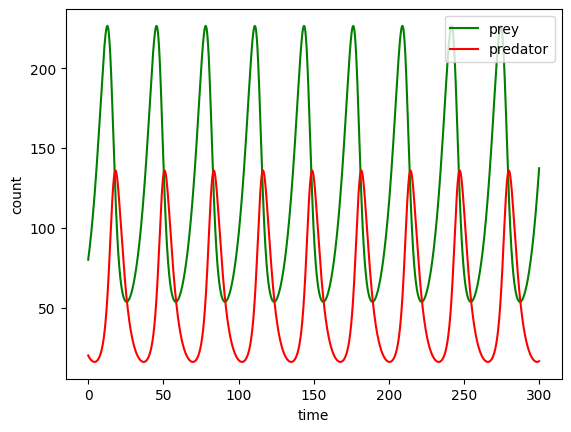

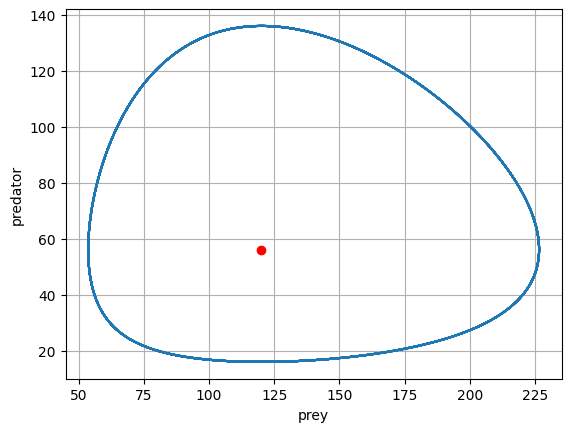

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def predator_prey_euler(x_0, y_0, a, b, d, c, t_end, delta_t):
    x = [x_0]
    y = [y_0]
    t = np.arange(0, t_end+delta_t, delta_t)

    for _ in range(len(t)-1):
        next_x = x[-1] + (a*x[-1] - b*x[-1]*y[-1])*delta_t #aktualne x + delta x
        x.append(next_x)

        next_y = y[-1] + (d*x[-1]*y[-1] - c*y[-1])*delta_t #aktualne y + delta y
        y.append(next_y)
    
    return x, y, t, max(x), max(y)

a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01
x0 = 80
y0 = 20

x, y, t, max_x, max_y = predator_prey_euler(x0, y0, a, b, d, c, 300, h)

#rysowanie wykresów
f, ax = plt.subplots(1)

fig1 = ax.plot(t, x, color="g", label="prey")
fig2 = ax.plot(t, y, color="r", label="predator")

ax.set_ylabel("count")
ax.set_xlabel("time")
ax.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

plt.plot(x, y)
plt.plot(c/d,a/b,"ro")
plt.xlabel("prey")
plt.ylabel("predator")
plt.grid()
plt.show()
        


##### Możemy teraz porównać wynik drugiej symulacji z analogicznym rozwiązaniem metodą z logarytmami podawaną w poprzednim rozdziale. Podstawiając odpowiednie współczynniki z poprzedniej symulacji ostrzymujemy 

C:\Users\zawer\AppData\Local\Temp\ipykernel_2620\1123575545.py:7: RuntimeWarning: divide by zero encountered in log
  return d*x + b*y - c*np.log(x) -a* np.log(y) - C


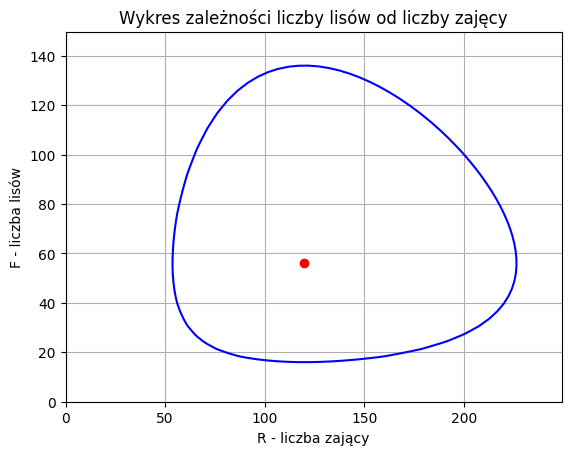

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation
def equation(x,y,a,b,c,d,x0,y0):
    C = d*x0 + b*y0 - c*np.log(x0) -a* np.log(y0)
    return d*x + b*y - c*np.log(x) -a* np.log(y) - C

crit_point = (c/d,a/b)
x_values = np.linspace(0, max_x*1.1)
y_values = np.linspace(0, max_y*1.1)

X, Y = np.meshgrid(x_values, y_values)

T_1 = equation(X, Y,a,b,c,d,x0,y0)

plt.contour(X, Y, T_1, levels=[0], colors='b')
plt.plot()
plt.plot(crit_point[0],crit_point[1],'ro')
plt.xlabel('R - liczba zający')
plt.ylabel('F - liczba lisów')
plt.title('Wykres zależności liczby lisów od liczby zajęcy')
plt.grid(True)
plt.show()

##### Wykres zachowuje się tak samo, jak ten dołączony do rozwiązania metodą Eulera (jedynie specyficzne skalowanie przeszkadza w odpowiedniej interpretacji), a więc funkcja wyliczająca trajektorię rozwiązań dla punktów początkowych $x_0$ i $y_0$ oraz stałej $C$ ustalonej dla tych punktów jest poprawna.
* *Tutaj też tym Warningiem o dzieleniu przez zero się proszę nie martwić, jest on spowodowany, podobnie jak u góry,tym, że wartości momentami są na tyle małe, że komputer traktuje je jako zero i ostrzega przed „niecnym" używaniem tego zera*

***

### Rozwiązanie numeryczne za pomocą metody Rungego-Kutty (4-tego stopnia) <a id="3_2"></a>

Metoda Eulera jest prosta do zaimplementowania, jednak oferuje ona dosyć niską dokładność. Z tego powodu przystąpmy do numeryczengo rozwiązania równania metodą Rungego-Kutty, która pozwali nam dużo lepiej przybliżyć wynik.

Metoda ta opiera się na przybliżaniu wyniku za pomocą obliczania wartości funkcji w kolejnych punktach posuwając się o krok $h$, gdzie używana jest średnia ważona przybliżonych wartości z przedziału $(t_n, t_n + h)$.

Wzór iteracyjny na kolejny wyraz wygląda następująco
\begin{equation*}
    x_{n+1} = x_n + (k_1 + 2k_2 + 2k_3 + k_4) ,
\end{equation*}

gdzie

\begin{equation*}
    \begin{split}
        k_1 &= f(t_n, x_n) \\
        k_2 &= f(t_n + \frac{h}{2}, x_n + \frac{k_1h}{2}) \\
        k_3 &= f(t_n + \frac{h}{2}, x_n + \frac{k_2h}{2}) \\
        k_4 &= f(t_n + h, x_n + k_3h) .
    \end{split}
\end{equation*}

[50.         50.02004774 50.04019091 ... 50.53346928 50.55589919
 50.57842295]


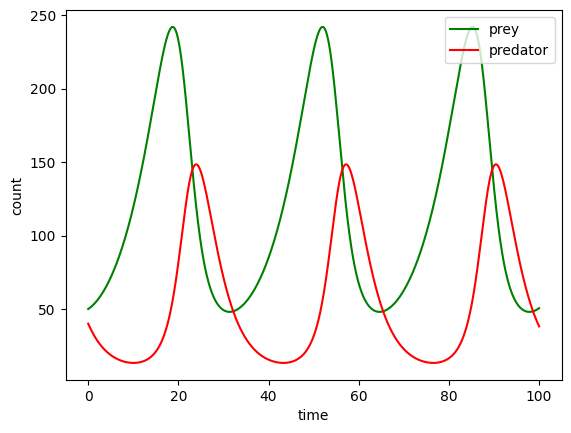

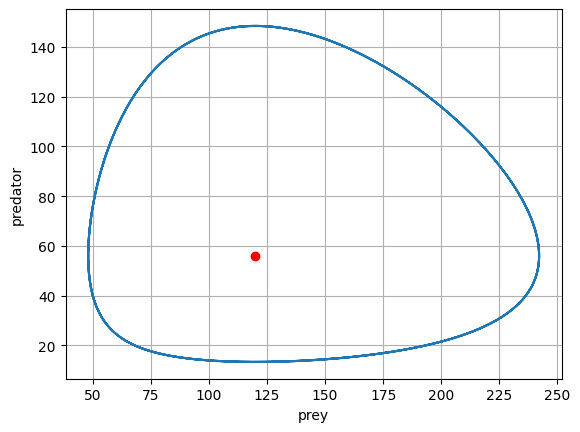

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra_fun(t, y, a, b, d, c):
    dxdt = a*y[0] - b*y[0]*y[1]
    dydt = d*y[0]*y[1] - c*y[1]
    return np.array([dxdt, dydt])

def runge_kutta(t, y, h, a ,b, d, c):
    k1 = lotka_volterra_fun(t, y, a, b, d, c)
    k2 = lotka_volterra_fun(t+h/2, y+k1*h/2, a, b, d, c)
    k3 = lotka_volterra_fun(t+h/2, y+k2*h/2, a, b, d, c)
    k4 = lotka_volterra_fun(t+h, y+k3*h, a, b, d, c)

    next_y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return next_y

def calculate_lotka_volterra_with_runge_kutta(initial_cons, t_end, a, b, d, c, h):
    t = np.arange(0, t_end+h, h)
    y = np.zeros((len(t), len(initial_cons)))
    y[0] = initial_cons

    for i in range(1, len(t)):
        y[i] = runge_kutta(t[i-1], y[i-1], h, a, b, d, c)

    return t, y

x_0 = 50
y_0 = 40
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

print(y[:, 0])

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.xlabel("prey")
plt.ylabel("predator")
plt.plot(c/d,a/b,"ro")
plt.grid()
plt.show()



##### Drugi wykres prezentuje trajektorię rozwiązań identyczną, co model zaimplementowany metodą Eulera, ponieważ ta trajektoria dla tych samych danych powinna wyjść taka sama, a subtelne różnice obu implementacji są wytłumaczone w rubryce poniżej. 

***

### Porównanie metod Eulera i Runge-Kutty <a id="3_3"></a>

Obie metody są do siebie bardzo zbliżone, jednakże ze względu na aż 4 kroki obliczeniowe w algorytmie Runge-Kutty metoda ta charakteryzuje się dużo większa dokładnością oraz stabilnością w porównaniu do Eulera. Jest to jednak okupione zwiększoną złożonością obliczeniową.

Poniżej znajduje się porównanie wykresów powstałych za pomocą obydwu metod, a także czasów działania programów.

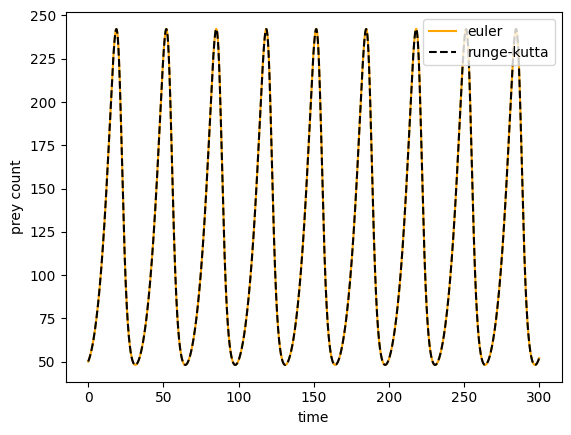

Metoda Runge-Kutta była wolniejsza od metody Eulera o 0.8361616134643555s


In [6]:
import time

x_0 = 50
y_0 = 40
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01
t_end = 300

es = time.time()
x_e, y_e, t_e, max_x, max_y = predator_prey_euler(x_0, y_0, a, b, d, c, t_end, h)
ee = time.time()
t, y_rk = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), t_end, a, b, d, c ,h)
rke = time.time()

plt.plot(t, x_e, color="orange", label="euler")
plt.plot(t, y_rk[:, 0], color="black", label="runge-kutta", linestyle="dashed")
plt.legend(loc="upper right")
plt.xlabel("time")
plt.ylabel("prey count")
plt.show()

euler_time = ee - es
runge_kutta_time = rke-ee

print(f"Metoda Runge-Kutta była wolniejsza od metody Eulera o {runge_kutta_time - euler_time}s")




***

# Modyfikacje modelu podstawowego <a id="4"></a>

Podstawowy model Lotki-Volterry jest nierealny, ponieważ nie uwzględnia on ograniczonych zasobów potrzebnych do rozwoju populacji ofiar (przy zerowej populacji drapieżników populacja ofiar będzie wykładniczo rosła w nieskończoność). Zmodyfikujmy nieco równanie, aby rozwiązać ten problem.

\begin{align*}
    \frac{\mathbb{d}x}{\mathbb{d}t} &= x(a - ex - by) \\[2 em]
    \frac{\mathbb{d}y}{\mathbb{d}t} &= -y(c - dx) ,
\end{align*}

gdzie

* $a$ - współczynnik rozrodczości ofiar
* $b$ - współczynnik określający jak szybko ofiary są zjadane przez drapieżników
* $c$ - współczynnik śmierci drapieżników
* $\frac{a}{e}$ - pojemność środowiska ofiar (nielażnie od drapieżników)
* $d$ - współczynnik rozdrodczości drapieżników w zależności od liczby zjadanych ofiar .


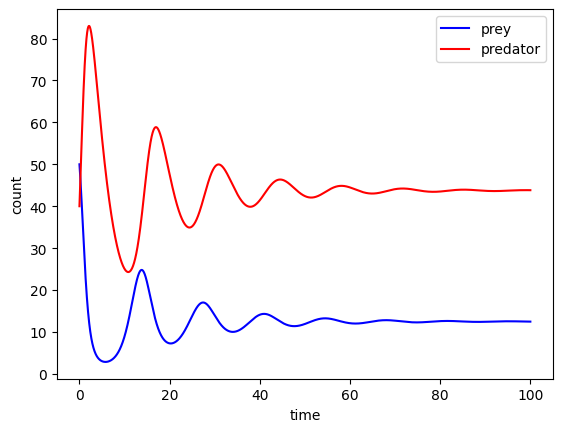

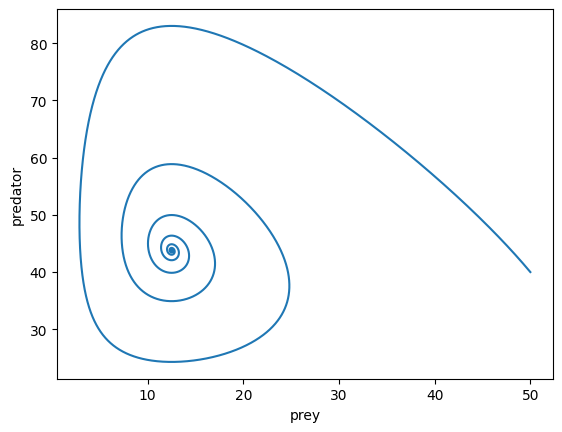

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra_fun_mod(t, y, a, b, d, c, e):
    dxdt = y[0]*(a - e*y[0] - b*y[1])
    dydt = -y[1]*(c - d*y[0])
    return np.array([dxdt, dydt])

def runge_kutta_mod(t, y, h, a ,b, d, c, e):
    k1 = lotka_volterra_fun_mod(t, y, a, b, d, c, e)
    k2 = lotka_volterra_fun_mod(t+h/2, y+k1*h/2, a, b, d, c, e)
    k3 = lotka_volterra_fun_mod(t+h/2, y+k2*h/2, a, b, d, c, e)
    k4 = lotka_volterra_fun_mod(t+h, y+k3*h, a, b, d, c, e)

    next_y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return next_y

def calculate_lotka_volterra_with_runge_kutta_mod(initial_cons, t_end, a, b, d, c, e, h):
    t = np.arange(0, t_end+h, h)
    y = np.zeros((len(t), len(initial_cons)))
    y[0] = initial_cons

    for i in range(1, len(t)):
        y[i] = runge_kutta_mod(t[i-1], y[i-1], h, a, b, d, c, e)

    return t, y

x_0 = 50
y_0 = 40
a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.xlabel("prey")
plt.ylabel("predator")
plt.show()



##### W przypadku tej symulacji widzimy inne zachowanie niż przy okazji modelu podstawowego, albowiem trajektoria ma kształt spirali. Można wytłumaczyć ten trend spadkiem amplitudy drgań (co widać poprzez spłaszczenie obu funkcji pod koniec symulacji), co oznacza, że wahania te będą coraz mniejsze, aż w końcu zerowe, a tę tendencję do ich zmniejszenia przedstawia trajektoria „pikująca" w dół do punktu krytycznego dla wprowadzonych danych. 

***

# Analiza wyników symulacji i wnioski <a id="5"></a>

***

### Analiza podstawy <a id="5_1"></a>

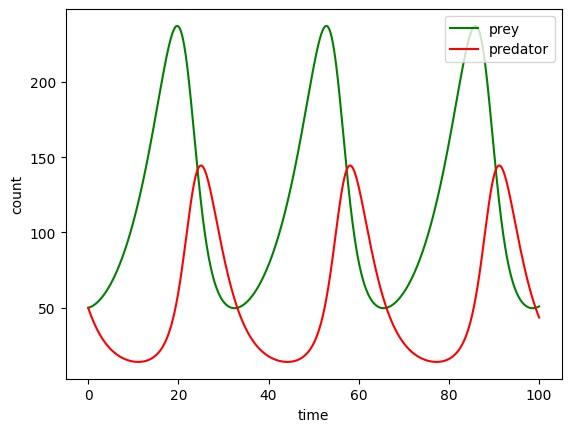

In [8]:
x_0 = 50
y_0 = 50
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Możemy zauważyć, że przy odpowiednio dobranych parametrach populacje ofiar i drapieżników oscylują, przy czym są przesunięte w fazie (wzrost liczby ofiar sprawia, że populacja drapieżników także rośnie, natomiast "reaguje" na te zmiany z opóźnieniem)

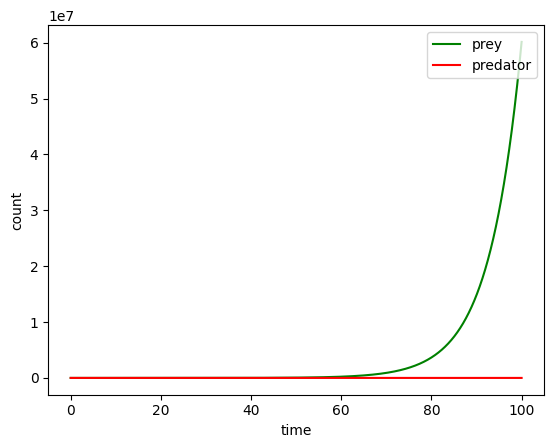

In [16]:
x_0 = 50
y_0 = 0
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Wykładniczy wzrost liczby ofiar powoduje, że przy braku drapieżników w środowisku nasz model staje się modelem maltuzjańskim dla wzrostu populacji ofiar.

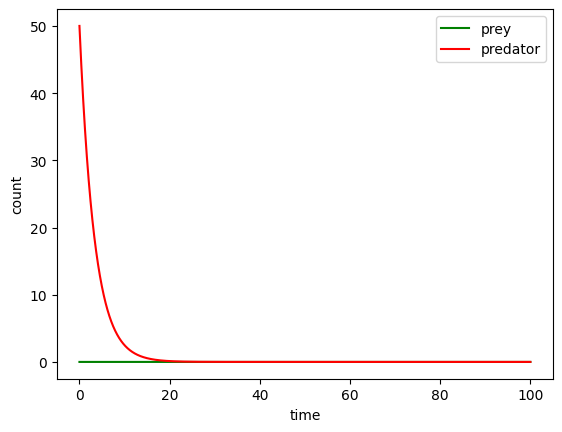

In [17]:
x_0 = 0
y_0 = 50
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Natomiast przy braku ofiar w środowisku możemy zaobserwować kompletne wymarcie populacji drapieżników, ze względu na brak pożywienia.

##### Zajmijmy się teraz modyfikacją poszczególnych parametrów

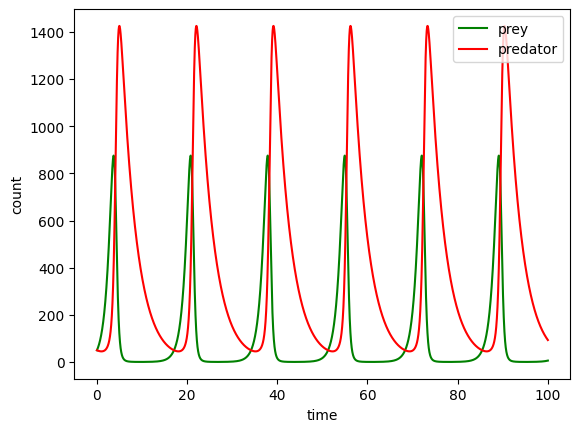

In [18]:
x_0 = 50
y_0 = 50
a = 1
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Przy wysokim współczynniku rozdrodczości ofiar $a$, możemy zaobserwować, że ich populacja bardzo szybko rośnie, co jednak wiąże się z jednoczesnym szybkim wzrostem populacji drapieżników, co następnie prowadzi do gwałtownego spadku liczebności ofiar.

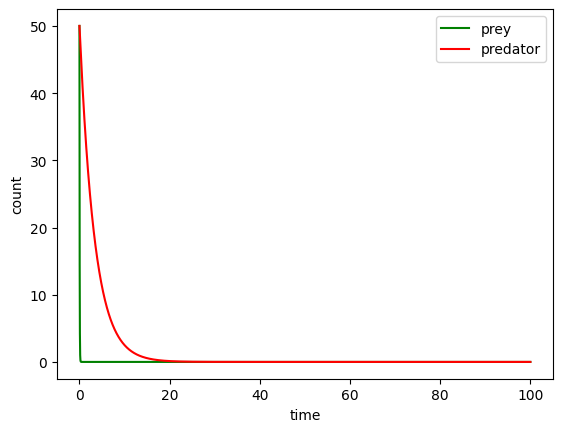

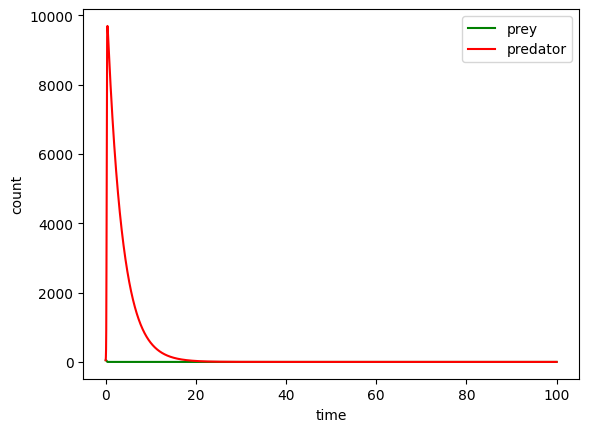

In [19]:
x_0 = 50
y_0 = 50
a = 0.14
b = 0.5
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

x_0 = 50
y_0 = 50
a = 0.14
b = 0.0025
d = 0.5
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Jeśli współczynnik śmiertelności ofiar $b$ (zależny od liczebności drapieżników) jest zbyt wysoki to może to doprowadzić do wymarcia obu populacji ze względu na zbyt szybkie zjedzenie przez drapieżników wszystkich ofiar, a następne ich wymarcie z głodu.

##### Podobna sytuacja może mieć miejsce, jeśli współczynnik rozrodczości drapieżników $d$ (zależny od liczebności ofiar) jest zbyt wysoki. Zbyt duża przewaga drapieżników w środowisku spowoduje szybkie wymarcie ofiar (a potem tychże drapieżników z głodu).

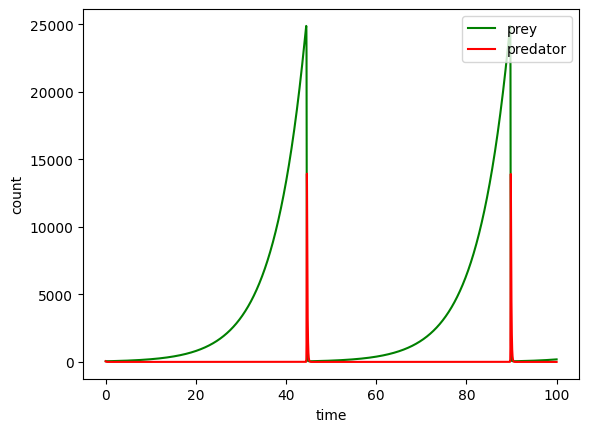

In [20]:
x_0 = 50
y_0 = 50
a = 0.14
b = 0.0025
d = 0.0025
c = 10
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Przy wysokim współczynniku śmiertelności drapieżników $c$ (niezależnym od liczebności populacji ofiar), populacja drapieżników gwałtownie spada, kiedy tylko w środowisku zabraknie wystarczająco dużej ilości ofiar.

##### Spróbujmy teraz użyć naszego modelu do monitorawania zmian liczebności populacji rysi i zajęcy w latach 1900 - 1920

<center>
<img src="lynx_hares.png" alt="lynx_hares.png">
</center>

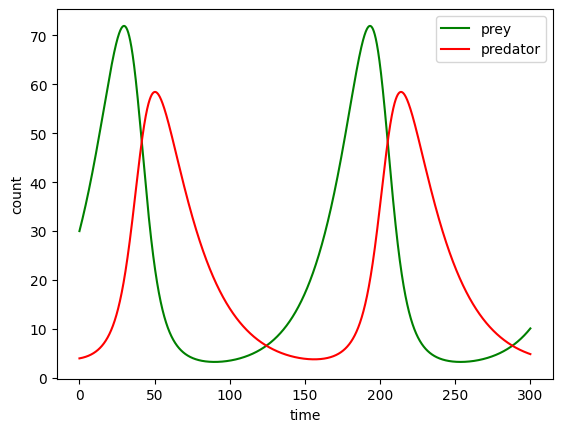

In [21]:
x_0 = 30
y_0 = 4
a = 0.05
b = 0.0025
d = 0.0018
c = 0.04
h = 0.001

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 300, a, b, d, c, h)

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

##### Po dostosowaniu odpowiednio współczynników równania jesteśmy w stanie wygenerować wykres, który będzie cechował się takimi samymi trendami zmian wielkości obu populacji, co dane z tabeli. Można to dodatkowo porównać z wykresem sprzedaży futer do Kompanii Zatoki Hudson'a w tych samych latach.

<center>
    <img src="lynx_hares_plot.png" alt="lynx_hares_plot.png">
</center>

***Wnioski:***
Proste równania Lotki-Volterry mogą zostać skutecznie wykorzystane do modelowania wielkości populacji drapieżników i ofiar oraz zależności pomiędzy nimi.

Model ten ma jednak swoje ograniczenia, ponieważ stosując go zakładamy, że:
* w środowisku występują tylko dwa gatunki
* bez drapieżników w środowisku populacja ofiar będzie rosła zgodnie z modelem Malthusa
* bez ofiar w środowisku drapieżniki wymrą ze względu na brak pożywienia
* kiedy występują oba gatunki (a współczynniki są rozsądnie dobrane) to mamy do czynienia z cyklicznymi zmianami ilości osobników obu gatunków
* liczba kontaktów pomiędzy gatunkami jest proporcjonalna do liczebności tychże grup, a rozmieszczenie osobników w środowisku nie jest brane pod uwagę (znaczenie ma jedynie średnie zagęszczenie)

***

### Analiza modyfikacji <a id="5_2"></a>

#### Przeanalizujemy teraz kilka wykresów zmodyfikowanego modelu podstawowego, omawiając szczegóowiej zachowanie funkcji dla różnych etapów symulacji oraz dla różnych wartości paramaterów.

##### - parametry niezmienne, jeden przedstawiciel ofiar

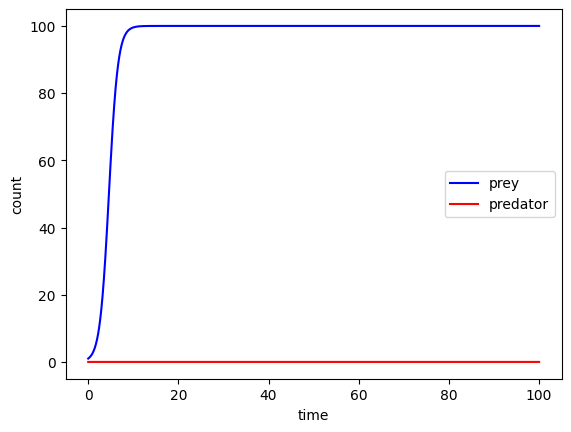

In [9]:
x_0 = 1
y_0 = 0
a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

Widzimy, że przedstawicieli lisów nie ma w ekosystemie w ogóle, natomiast zające rozmnażają się gwałtownie do pewnego pułapu i już tam zostają. Nie ma żadnych drgań ani tłumienia.

**Wnioski:**

Sytuacja widoczna na wykresie jest spowodowana tym, że nie wprowadziliśmy do układu drapieżnika. Umożliwia to ofierze swobodny wzrost, hamowany tym razem przez ograniczenie środowiskowe i zasobów. Gatunek zajęczy będzie rozwijał się do maksimum możliwości (czyli owych ograniczeń środowiskowych), a później będzie na tym maksimum utrzymywał (bo nie ma naturalnych wrogów powodujących jego śmierć).

##### - parametry niezmienne, 100 przedstawicieli drapieżników

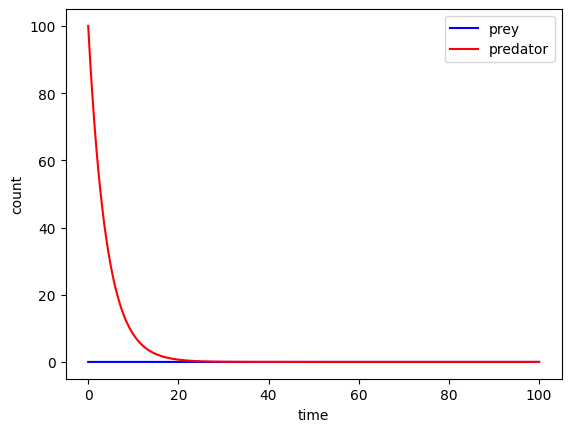

In [10]:
x_0 = 0
y_0 = 100
a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

Widzimy, że w układzie nie ma przedstawicieli ofiar, a krzywa liczebności drapieżników zmierza ku zeru, w 0 się ostatecznie stabilizując. Ponownie nie ma drgań ani tłumień.


**Wnioski:**

Dzieje się tak, gdyż przeżywalność drapieżników jest uzależniona od obecności ofiar. Jeśli w układzie nie ma ofiar, drapieżnicy dążą do wymarcia, bo nie mają pożywienia, a około 20. dnia wymiera ich ostatni przedstawiciel. Taki układ jest skrajnie niekorzystny dla lisów, ponieważ czeka ich niechybna śmierć, jeśli pozostaną na diecie „zającowej".

##### - parametry niezmienne, po jednym przedstawicielu każdego z gatunków 

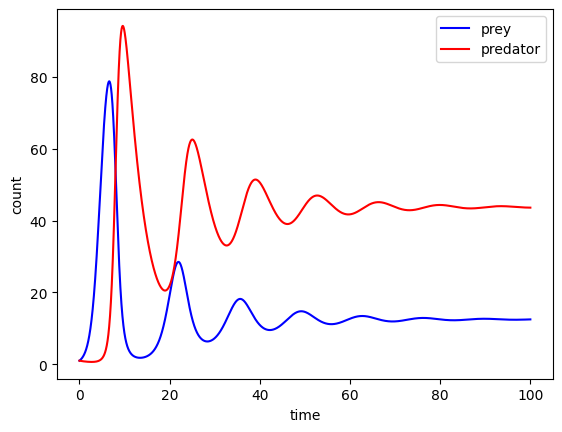

In [11]:
x_0 = 1
y_0 = 1
a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

Od razu możemy zaobserwować dość ciekawe zjawisko - tłumienie oscylacji aż do praktycznie zerowej. Na początku ofiary bardzo szybko się rozmnażają, jednak z każdym kolejnym powtórzeniem „cyklu" amplituda tych drgań maleje, a obie osie stabilzują się na pewnym pułapie. Drapieżników, liczbę których oznaczono na wykresie czerwoną linią, na końcu tej symulacji (około 50) jest więcej niż ofiar (około 10), liczba których oznaczona jest linią niebieską.

**Wnioski:**

Wykres pokazuje jak założenia modelu wpływają na wygląd obu populacji w ostatecznym rozrachunku, co można łatwo skonfrontować z metodą omawianą wyżej. Tam zmiany populacji były cykliczne, tutaj ekosystem **stabilizuje się** na pewnym pułapie, zależnym od parametrów, które wprowadziliśmy. Pierwsza oscylacja wygląda jak klasyczny model podstawowy, jednak ograniczone zasoby są zabójcze dla ofiar, które nie mogą się rozwijać zgodnie z maltuzjańskim modelem wzrostu populacji, a przyjmują raczej **model Verhulsta logistycznego wzrostu**, przez co w ostateczności zostają zdominowane w środowisku przez drapieżniki. Wyklarowanie się stabilnych osi udowadnia, że gatunki oba żyją ze sobą w „zgodzie" w ekosystemie, znajdując własną niszę i na niej się utrzymując.

##### - 100 ofiar vs 1 drapieżnik, ofiary są szybciej zjadane

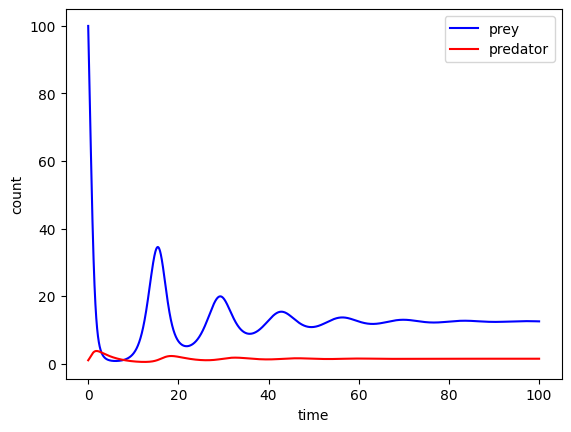

In [12]:
x_0 = 100
y_0 = 1
a = 1
b = 0.6
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

Tym razem mamy przypadek, gdzie ofiary święcą swoje triumfy, choć niewielkie. Po ogormnym piku, gdyż zostało wprowadzono aż 100 zajęcy do układu, gwałtownie ich liczba spada, aby finalnie ustabilizować się na pewnym niewielkim pułapie w porównaniu z początkowym stanem. Widać lekką próbę drgań po stronie drapieżników, ale niewielką i ostatecznie można ich status sklasyfikować na koniec symulacji jako „na wymarciu". 

**Wnioski:**

Może być to trochę dziwne, że prędkość zjadania ofiar została zwiększona, przez co najpierw ofiary tracą, ale generalnie korzystają, jednak ma to swoje uzasadnienie. Przez to że ofiary są szybciej zjadane, a drapieżniki rozmnażają się z taką samą prędkością, szybciej tracą pożywienie w środowisku, co powoduje ich równie szybkie wymieranie. Ostatecznie, mimo obecności drapieżników, jest ona znikoma, wobec równie znikomej liczby ofiar w porównaniu z 100 na początku. W pewnym momencie w układzie jest nawet więcej drapieżników niż ofiar, ale od tamtego momentu ich głód nie może być zaspokojny tak znikomą liczbą ofiar, która oscyluje w granicach 15.

##### - po jednym przedstawicielu, drapieżniki szybciej wymierają 

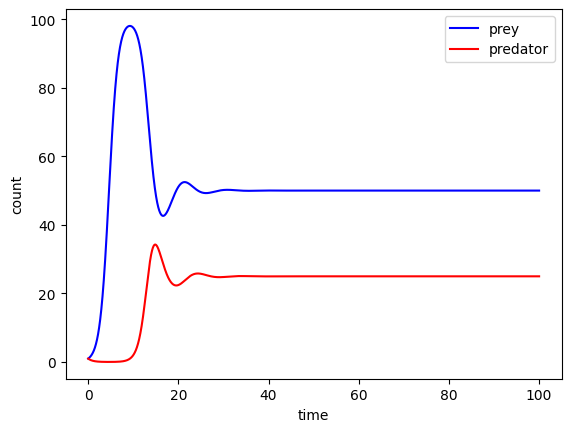

In [13]:
x_0 = 1
y_0 = 1
a = 1
b = 0.02
d = 0.02
c = 1
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

Można zauważyć, że wykres wygląda nadzwyczaj prosto. Mamy tylko jeden spory pik u ofiar i jeden mniejszy u drapieżników, poza tym drgania znowu są tłumione. 

**Wnioski:**

Wytłumaczenia na taki stan rzeczy nie trzeba daleko szukać. Jako że lisy umierają szybciej, to mogą stracić tylko, gdy jest mało zajęcy w układzie (czyli na początku). Z biegiem czasu, gdy zające się rozmnożą wystarczająco, drapieżniki mogą w końcu się pożywić i przeżywają swoje „tłuste lata", doprowadzając do zmniejszenia się liczebności zajęcy, samemu znów tracąc. W ostateczności poziom liczebności obu populacji stablizuje się na całkiem dobrym poziomie, gdzie zające stanowią około $\frac{2}{3}$ populacji ekosystemu.

##### - po jednym przedstawicielu, zwiększenie obszaru środowiska przez zmniejszenie parametru $e$

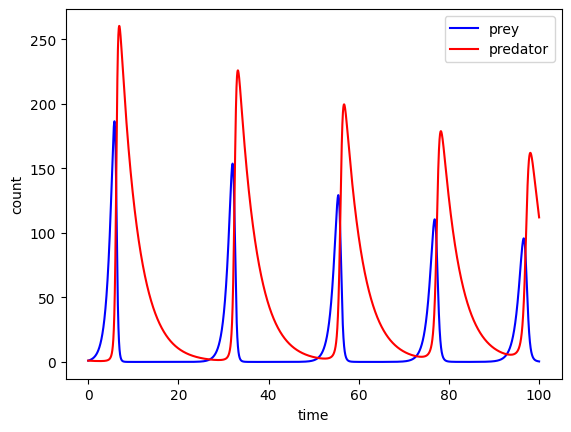

In [14]:
x_0 = 1
y_0 = 1
a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.001
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

Ten wykres jest kompletnie inny niż poprzednie z tego modelu. Widzimy tutaj ogromne amplitudy drgań i stopniowe, acz konsekwentne wypłaszczanie drgań. Można zaobserwować zdecydowane piki ofiar, za którymi podążają jeszcze bardziej zdecydowane piki drapieżników.

**Wnioski:**

Zwiększenie zasobów środowiska powoduje łatwiejszy wzrost populacji ofiar, jednak oznacza on również, przy niezmienionych pozostałych parametrach, korzystanie na tym drapieżników. W konsekwencji obserwujemy wzloty i upadki obu populacji, które też, można tak to nazwać, „metodą prób i błędów" próbują ustablizować ten układ (co stopniowo obserwujemy przez wypłaszczanie się drgań). Ta stablizacja jest przesunięta przez to w czasie i gdzieś pewnie później po 100. dniu osiągana.

***

### Porównanie z modelem rozwoju agresji <a id="5_3"></a>

Teraz dość ciekawy punkt, albowiem skonfrontujemy ten model z modelem rozwoju agresji z elementami teorii gier, z którym pracowaliśmy na 1 roku. Spokojnie, nie będziemy potrzebowali wiele informacji. Wystarczy tylko tyle, że:
* ofiary oznaczone przez „dovy" (po polsku *gołębie*), a drapieżniki „hawki" (*jastrzębie*),

* tworzona jest ograniczona plansza o danych wymiarach z jedzeniem, na którą rozlosowywane są nasze gatunki w danym ruchu,

* mogą one napotkać na swojej drodze w każdym ruchu: tylko jedzenie, przedstawiciela tego samego gatunku lub przedstawiciela drugiego gatunku,

* w zależności, co napotkają, może to mieć róże efekty: dove/hawk-jedzenie = +1 do gatunku (rozmnażają się), dove-dove = nic się nie dzieje (odchodzą w pokoju), hawk-hawk = -2 do hawk (walczą o jedzenie i oba umierają), dove-hawk = $\frac{1}{2}$ szansy, że do następnego ruchu oba przedstawiciele przeżyją, $\frac{1}{2}$, że dove zginie (-1 do gatunku), a hawk się rozmnoży (+1 do gatunku),

* symulujemy daną liczbę ruchów (tutaj dni), wprowadzając na początku daną liczbę obu gatunków.

Kod prezentuje się następująco (zamieszczamy go też w osobnym pliku Julii, ponieważ w Jupyterze nie można „puścić" i kodu Julii, i Pythona):

##### A to efekt tej symulacji:

<img src="newplot.png" alt="newplot.png">

##### Biorąc teraz odpowiednie warunki dla naszego modelu zmodyfikowanego (zwiększając śmiertelność drapieżników) możemy otrzymać:

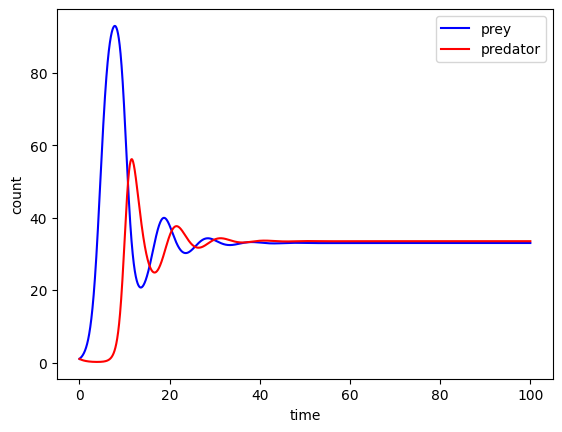

In [15]:
x_0 = 1
y_0 = 1
a = 1
b = 0.02
d = 0.02
c = 0.66
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta_mod(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

##### Widzimy, że tutaj również, przy większej śmiertleności drapieżników, układ stabizuje się na pułapie, gdzie obu gatunków jest mniej więcej cały czas po równo. Mimo że modele mają wspólne jedynie to, że w obu występuje zależność łańucha pokarmowego wobec siebie, otrzymujemy bardzo podobne wyniki, co jest dość zdumiewające. Można w teorii zaryzykować stwierdzenie, że oba modele mogą być rządzone tymi samymi prawami, a siła zależności oddziaływań międzygatunkowych obserwowana w obu modelach jest porównywalna. Pytanie, czy taką teorię można przekuć na praktykę? Czy populacje faktycznie się tak zachowują na ograniczonych środowiskach? Skoro wyniki modeli niepowiązanych ze sobą wyglądają bardzo podobnie może coś jest na rzeczy. Może jest możliwe w społeczeństwie lub ekosystemie wyidealizowany system, w którym każdy ma tę swoją mityczną równą część. A być może to tylko symulacje, a ten świat jest tylko więźniem modeli...

***

# Zakończenie <a id="6"></a>

#### ... czyli z czym idziemy w świat

##### To już koniec podróży po fascynującym świecie modelu drapieżnik-ofiara Lotki-Volterry. Zgodnie z postawionymi wcześniej celami:
* przedstawiliśmy w teorii oraz praktyce zastosowanie omawianego modelu, 

* odpowiednio go opisaliśmy, 

* następnie zmodyfikowaliśmy,

* i przeprowadziliśmy analizę eksperymentów z różnymi danymi wyjściowi,

* wysnuliśmy na ich podstawie wnioski na temat naszych modeli,

* i porównaliśmy je z innymi źródłami podobnych danych, 

* odpowiadając na parę pobocznych pytań.

##### Odpowiemy jeszcze na dwa. Pierwsze: czy model możnaby było jeszcze bardziej upodobnić do rzeczywistości? Na pewno, rozważając jeszcze bardziej „udziwniony" model z dodatkowymi czynnikami zewnętrznymi i opatrzony odpowiednimi parametrami. My skupiliśmy się jednak na dokładnym opisie jednej z dróg takowego upodobnienia i niewyczerpania (może błędnie) tematu w zupełności. Drugie: gdzie można znaleźć źródło mądrości, które wyłożyliśmy? W sekcji poniżej, w Bibliografii.
#### Dziękujemy za uwagę :)

# Bibliografia <a id="7"></a>